In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Euler's method for 1 diff eq
def Euler_1(Func,in_C,T_range):
    Y=np.empty_like(t_range)
    Y[0]=in_C
    for n in np.arange(N-1):
        h = T_range[n+1]-T_range[n]
        k1=Func(Y[n],T_range[n])
        Y[n+1]=Y[n]+k1*h
    return Y






#Euler's method for n diff eq (it returns Euler_1 if one equation is given)


def Euler_D(Funcs,in_C,T_range):
    N=len(T_range) 
    try:
        dim=len(Funcs)
    except:
        return Euler_1(Funcs,in_C,T_range)
    if dim == 1:
        return Euler_1(Funcs[0],in_C[0],T_range)
        
    Y=np.empty([N,dim])

    for i in np.arange(dim):
        Y[0][i]=in_C[i]
    
    for n in np.arange(N-1):
        h = t_range[n+1]-t_range[n]
        for i in np.arange(dim):
            k1=Funcs[i](Y[n],t_range[n])
            Y[n+1][i]=Y[n][i]+k1*h
    
    return Y

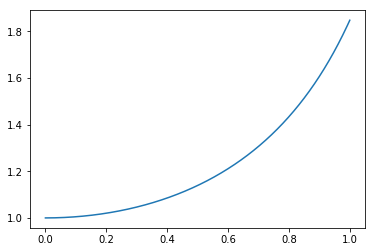

In [3]:
def dydt(y,t):
    return np.sin(t)*y**2
N=1000
t_range=np.linspace(0,1,N)
sol=Euler_D(dydt,1,t_range)

plt.plot(t_range,sol)
plt.show()

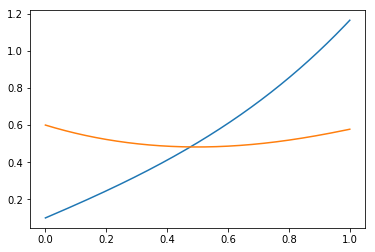

In [4]:
def dxdt(r,t):
    x=r[0]
    y=r[1]
    return y+x

def dydt(r,t):
    x=r[0]
    y=r[1]
    return np.sin(x)-y

N=1000
t_range=np.linspace(0,1,N)
R=Euler_D([dxdt,dydt],[0.1,0.6],t_range)

plt.plot(t_range,R)
plt.show()